In [1]:
from matplotlib import pyplot as plt
from lmfit import Model
import numpy as np
import pandas as pd
from IPython.display import display, Math, Markdown

In [2]:


text = r"""
Termistor je elektronická součástka, jejíž elektrický odpor je závislý na teplotě. Odpor termistoru jde vyjádřit vztahem:
"""
rovnice1 = Math(r'R(T) = R_\infty e^{\frac{B}{T}}')
text2 = r"""
Kde $R_\infty$ je konstanta a $B$ je teplotní citlivost vlastní danému termistoru.

Schéma zapojení na Obr. 1 nám umožňuje převést měření odporu na měření napětí, a následně ke sběru dat použít PC. Odpor termistoru $R$ se pak vypočítá podle vztahu:
"""
rovnice2 = Math(r'R = \frac{U_T}{U_N}R_N')

display(Markdown(text))
display(rovnice1)
display(Markdown(text2))
display(rovnice2)


Termistor je elektronická součástka, jejíž elektrický odpor je závislý na teplotě. Odpor termistoru jde vyjádřit vztahem:


<IPython.core.display.Math object>


Kde $R_\infty$ je konstanta a $B$ je teplotní citlivost vlastní danému termistoru.

Schéma zapojení na Obr. 1 nám umožňuje převést měření odporu na měření napětí, a následně ke sběru dat použít PC. Odpor termistoru $R$ se pak vypočítá podle vztahu:


<IPython.core.display.Math object>

In [3]:
from IPython.display import display, Markdown

text = r"""
Hodnotu napětí rezistoru jsme zapomněli odebrat, a tak byla vypočtena z fitu referenčních dat.\newline 
Hodnota kalibračního rezistoru byla vyměřena na 330$\Omega$.
"""
import pandas as pd

# Data pro tabulku
import pandas as pd

# Data pro tabulku
data = {
    "T [K]": [311.55, 312.85, 313.95, 315.25, 316.65, 318.15, 319.65, 321.25, 322.75, 324.25, 
              325.75, 327.15, 328.55, 329.95, 331.25, 332.55, 333.75, 334.95, 336.05],
    "U_N [V]": [0.629, 0.640, 0.649, 0.659, 0.671, 0.683, 0.695, 0.708, 0.720, 0.732, 
                0.744, 0.755, 0.766, 0.778, 0.788, 0.799, 0.808, 0.818, 0.827],
    "U_T [V]": [0.805, 0.784, 0.770, 0.756, 0.741, 0.726, 0.712, 0.698, 0.683, 0.668, 
                0.656, 0.644, 0.633, 0.621, 0.611, 0.600, 0.591, 0.581, 0.571]
}

# Vytvoření DataFrame
df = pd.DataFrame(data)

# Zobrazení tabulky
print(df)

display(Markdown(text))


     T [K]  U_N [V]  U_T [V]
0   311.55    0.629    0.805
1   312.85    0.640    0.784
2   313.95    0.649    0.770
3   315.25    0.659    0.756
4   316.65    0.671    0.741
5   318.15    0.683    0.726
6   319.65    0.695    0.712
7   321.25    0.708    0.698
8   322.75    0.720    0.683
9   324.25    0.732    0.668
10  325.75    0.744    0.656
11  327.15    0.755    0.644
12  328.55    0.766    0.633
13  329.95    0.778    0.621
14  331.25    0.788    0.611
15  332.55    0.799    0.600
16  333.75    0.808    0.591
17  334.95    0.818    0.581
18  336.05    0.827    0.571



Hodnotu napětí rezistoru jsme zapomněli odebrat, a tak byla vypočtena z fitu referenčních dat.\newline 
Hodnota kalibračního rezistoru byla vyměřena na 330$\Omega$.


In [4]:
df = pd.read_excel('data.xlsx')
UN=df["UN"].tolist()
UT=df["UT"].tolist()
T =df["T"].tolist()

In [5]:
def linear(x,a,b):
    return a*x+b
lmodel=Model(linear)
result=lmodel.fit(UN, x=T, a=1, b=0)


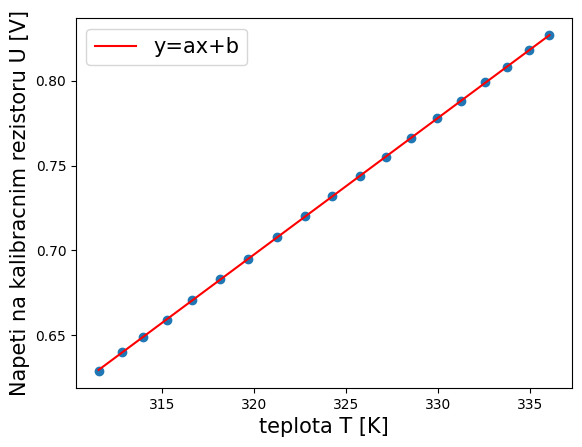

In [6]:
plt.scatter(T, UN)
plt.plot(T, result.best_fit, color = "red", label='y=ax+b')
plt.rcParams.update({'font.size': 15})
plt.ylabel('Napeti na kalibracnim rezistoru U [V]', fontsize=15)
plt.xlabel('teplota T [K]', fontsize=15)
plt.legend()
plt.show()

In [7]:
print(result.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 19
    # variables        = 2
    chi-square         = 1.5101e-06
    reduced chi-square = 8.8832e-08
    Akaike info crit   = -306.607239
    Bayesian info crit = -304.718361
[[Variables]]
    a:  0.00805438 +/- 8.8736e-06 (0.11%) (init = 1)
    b: -1.87977770 +/- 0.00287596 (0.15%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -1.000


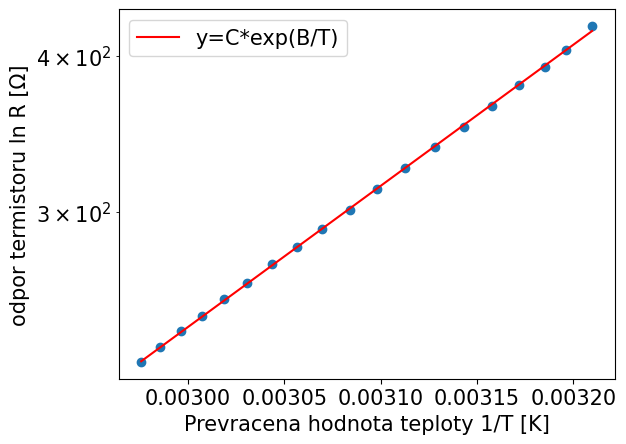

In [8]:
X=[]
U=[]
for i in T:
    X.append(1/i)

    
for j in range(len(UN)):
    U.append((UT[j]/UN[j])*330)

def ln (x,C,B):
    return C*np.exp(B/x)
lnmodel=Model(ln)
result=lnmodel.fit(U, x=T, C=1, B=1)


plt.rcParams.update({'font.size': 15})
plt.ylabel('odpor termistoru ln R [\u03A9]', fontsize=15)
plt.xlabel('Prevracena hodnota teploty 1/T [K]', fontsize=15)
plt.scatter(X, U)
plt.yscale("log")
plt.plot(X, result.best_fit, color = "red", label='y=C*exp(B/T)')
plt.legend()
plt.show()

In [9]:
print(result.fit_report())

[[Model]]
    Model(ln)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 134
    # data points      = 19
    # variables        = 2
    chi-square         = 25.3236707
    reduced chi-square = 1.48962769
    Akaike info crit   = 9.45871105
    Bayesian info crit = 11.3475890
[[Variables]]
    C:  0.10183101 +/- 0.00392643 (3.86%) (init = 1)
    B:  2592.37167 +/- 12.3720123 (0.48%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(C, B) = -1.000


In [10]:

# Textový popis s LaTeX
text = """
Hodnota $R_\\infty$ vyšla počtem $R_\\infty = 0{,}1 \\, \\Omega$, hodnota $B$ vyšla $B = 2584{,}3 \\, \\text{K}$ a tedy odpor termistoru při $0{}^\circ\\text{C}$ vyšel přibližně $R_{0{}^\circ\\text{C}} = 1337 \\, \\Omega$. Odpor termistoru pomocí grafické extrapolace vyšel přibližně $1330 \\, \\Omega$. Rozdíl bude nejspíše zapříčiněn nedostatečně podrobnými osami.
"""



# Zobrazení textu s LaTeXem
display(Markdown(text))



Hodnota $R_\infty$ vyšla počtem $R_\infty = 0{,}1 \, \Omega$, hodnota $B$ vyšla $B = 2584{,}3 \, \text{K}$ a tedy odpor termistoru při $0{}^\circ\text{C}$ vyšel přibližně $R_{0{}^\circ\text{C}} = 1337 \, \Omega$. Odpor termistoru pomocí grafické extrapolace vyšel přibližně $1330 \, \Omega$. Rozdíl bude nejspíše zapříčiněn nedostatečně podrobnými osami.


In [11]:


# Textový popis s LaTeX
text = """
Z naměřených hodnot jsme grafickou extrapolací získali odpor přibližně $1330 \\, \\Omega$, početní extrapolací $1337 \\, \\Omega$. 

Teplotní citlivost termistoru je $B = 2584{,}3 \\, \\text{K}$ a konstanta $R_\\infty = 0{,}1 \\, \\Omega$.
"""

# Zobrazení textu s LaTeXem
display(Markdown(text))



Z naměřených hodnot jsme grafickou extrapolací získali odpor přibližně $1330 \, \Omega$, početní extrapolací $1337 \, \Omega$. 

Teplotní citlivost termistoru je $B = 2584{,}3 \, \text{K}$ a konstanta $R_\infty = 0{,}1 \, \Omega$.
